In [ ]:
# install dependencies : 

!pip install tensorflow opencv-python matplotlib

In [ ]:
# check if the dependencies have been installed

!pip list

# Extra - for listing directories
###     >>> os.listdir('data')

###     >>> i aint writing any code for GPU cause i dont have any which is usable

# 1.1 remove corrupted images : 

In [36]:
import cv2
import imghdr
import os
from matplotlib import pyplot as plt
import tensorflow as tf
import numpy as np

In [37]:
data_dir = 'data'

In [38]:
# image extensions to be used :
image_ext = ['jpeg', 'jpg', 'png', 'bnp']

# Extra - cv2 returns a numpy array 3dim if colored and 2dim if BW
### also matplotlib to display image for analysis

In [39]:
img = cv2.imread(os.path.join(data_dir, "happy", "image32.jpeg"))
print(img.shape)
print(img. ndim)
print(img)

(256, 197, 3)
3
[[[236 236 236]
  [238 238 238]
  [240 240 240]
  ...
  [234 234 234]
  [240 240 240]
  [248 248 248]]

 [[236 236 236]
  [239 239 239]
  [241 241 241]
  ...
  [237 237 237]
  [241 241 241]
  [247 247 247]]

 [[235 235 235]
  [238 238 238]
  [241 241 241]
  ...
  [238 238 238]
  [241 241 241]
  [247 247 247]]

 ...

 [[255 254 255]
  [255 254 255]
  [255 254 255]
  ...
  [255 255 255]
  [252 252 252]
  [248 248 248]]

 [[252 253 255]
  [250 251 255]
  [253 252 254]
  ...
  [253 253 253]
  [250 250 250]
  [246 246 246]]

 [[249 250 254]
  [247 248 252]
  [250 249 251]
  ...
  [251 251 251]
  [248 248 248]
  [245 245 245]]]


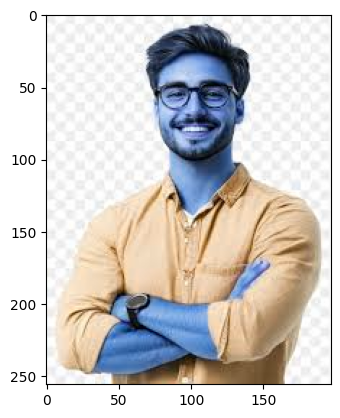

In [40]:
plt.imshow(img)

# 1.2 filtering out images

In [41]:
for imageFolder in os.listdir(data_dir) :
    for image in os.listdir(os.path.join(data_dir, imageFolder)) :
        newPath = os.path.join(data_dir, imageFolder, image)
        try :
            img = cv2.imread(newPath)
            tip = imghdr.what(newPath)
            if tip not in image_ext:
                print(f"this image in the dataset ain't valid {newPath}")
                os.remove(newPath)
        
        except Exception as e : 
            print("issue with image {}".format(image_path))

[ WARN:0@1823.549] global grfmt_png.cpp:695 read_chunk chunk data is too large
libpng warning: iCCP: known incorrect sRGB profile


# 1.3 Loading the dataset

In [ ]:
tf.data.Dataset??

In [46]:
dataset = tf.keras.utils.image_dataset_from_directory('data')
dataset

Found 269 files belonging to 2 classes.


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

#### convert to numpy iterator for accessing data that has been generated

In [34]:
data_iterator = dataset.as_numpy_iterator()
data_iterator

NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x7f57fc46fe00>)

In [50]:
# images represented as numpy arrays (takes a batch of images after processing)
batch = data_iterator.next()
print(batch[0].shape)
batch[1]

(32, 256, 256, 3)


array([0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1], dtype=int32)

### 0 ===> HAPPY (^u^)
### 1 ===> SAD (xnx)

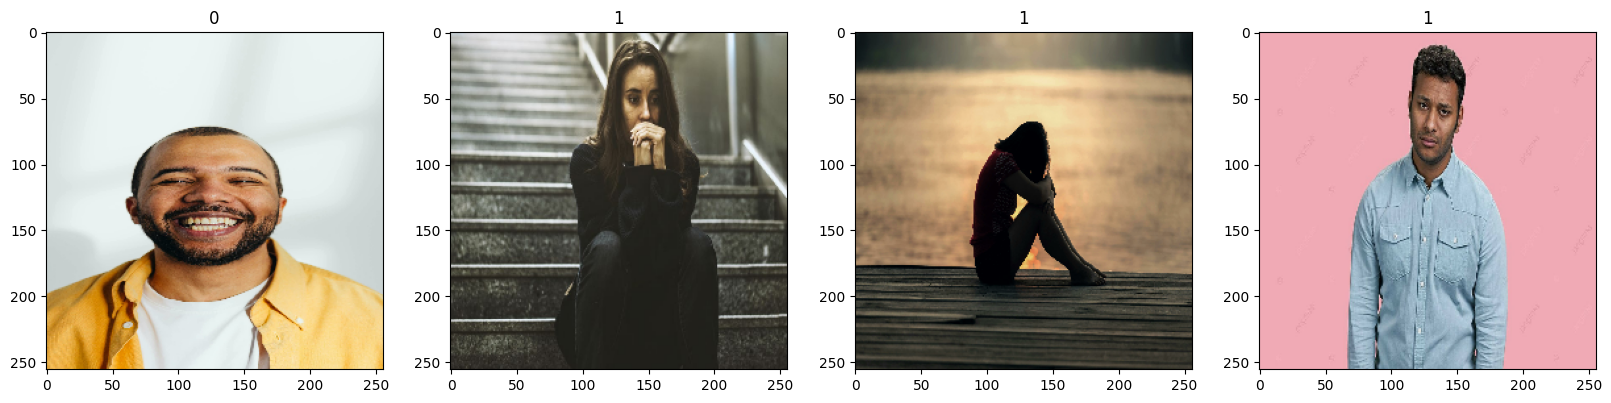

In [54]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])